<a href="https://colab.research.google.com/github/KathituCodes/Mall-Customer-Segmentation-Clustering/blob/main/Python_Mall_Customer_Segmentation_%26_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('/content/Mall_Customers (1).csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


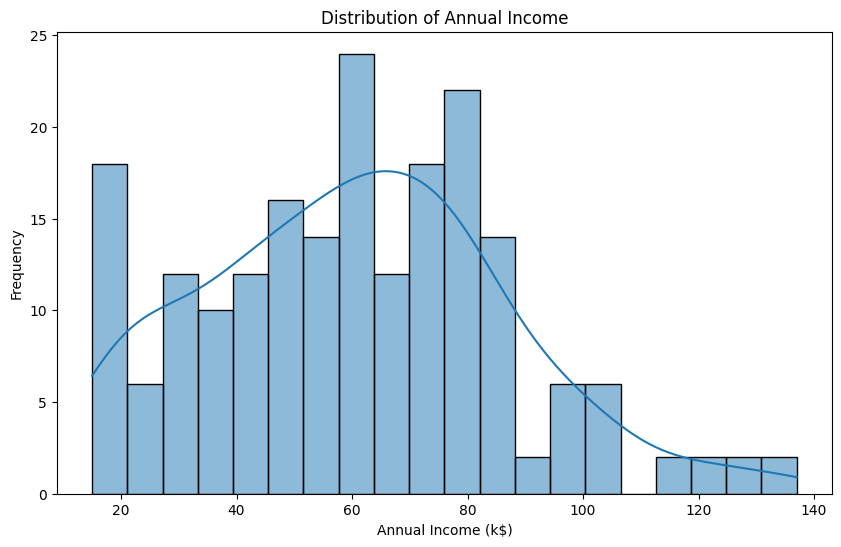

In [ ]:
# plot histogram to show distribution of "Annual Income (k$)"
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

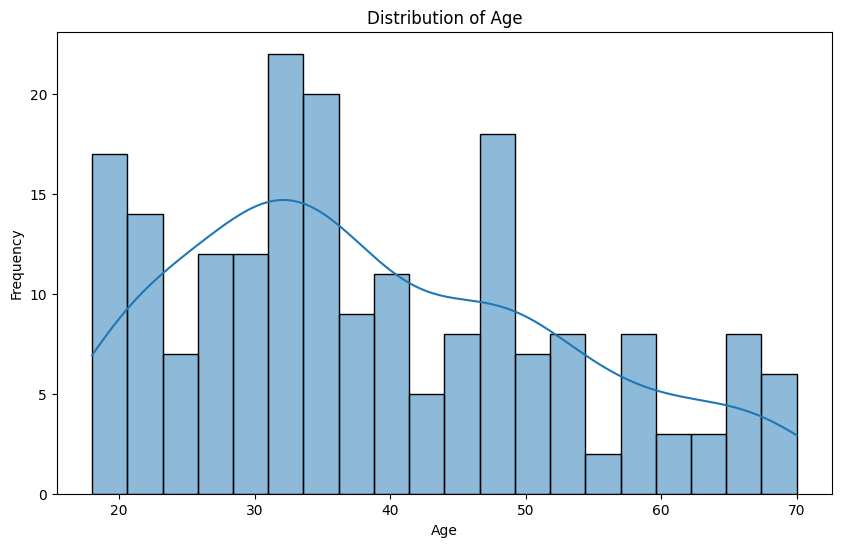

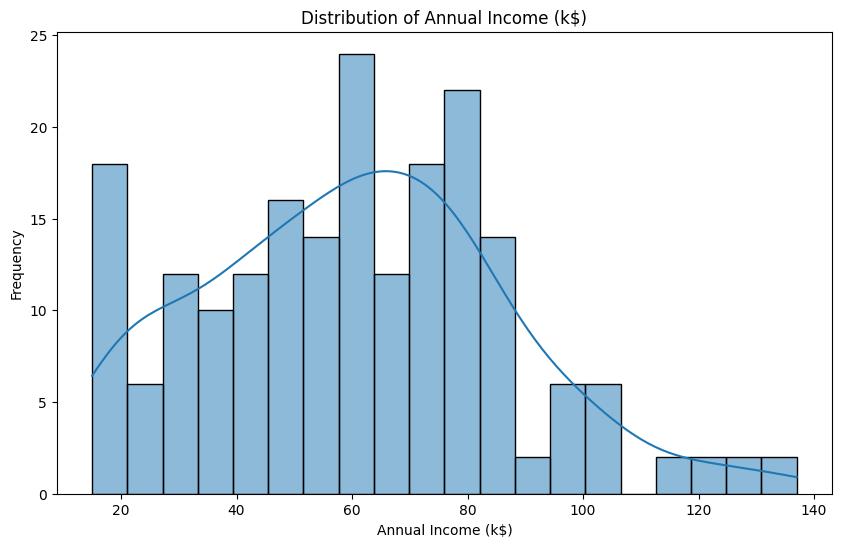

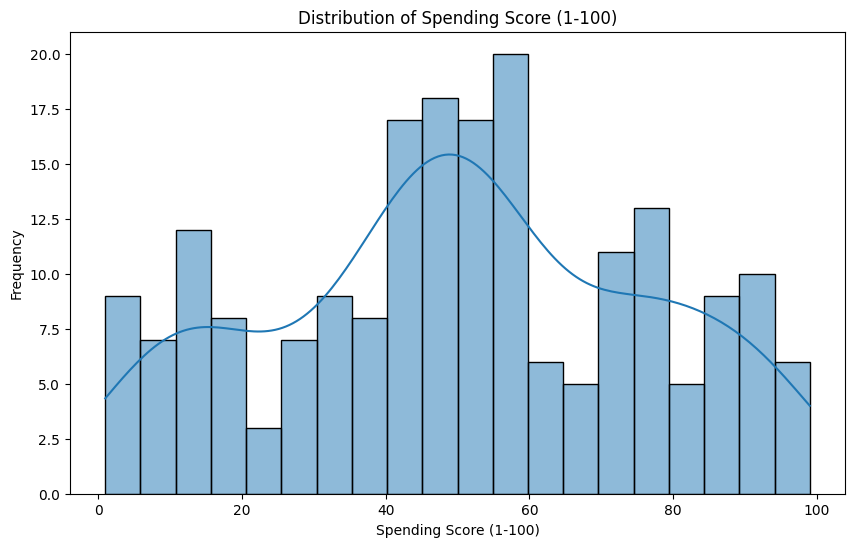

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[i], bins=20, kde=True)
  plt.title(f'Distribution of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()

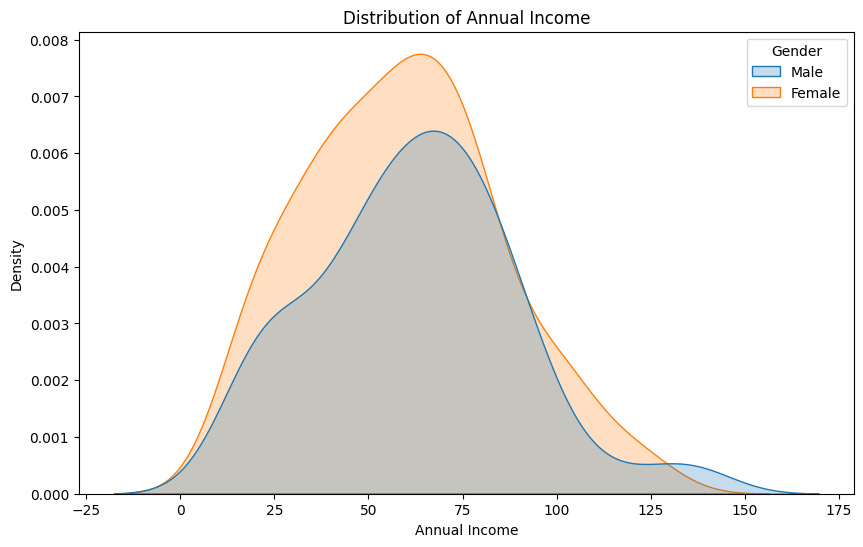

In [ ]:
# plot kde plot
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['Annual Income (k$)'], shade=True, hue = df['Gender'])
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.show()

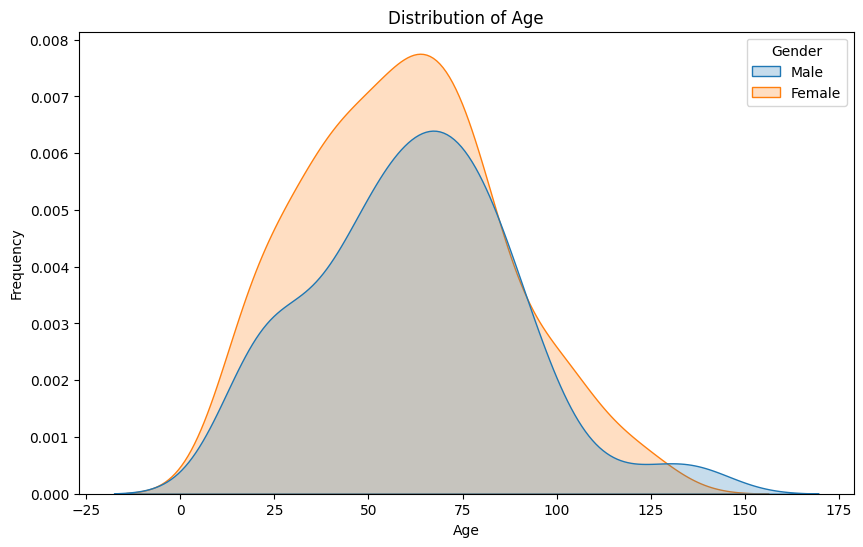

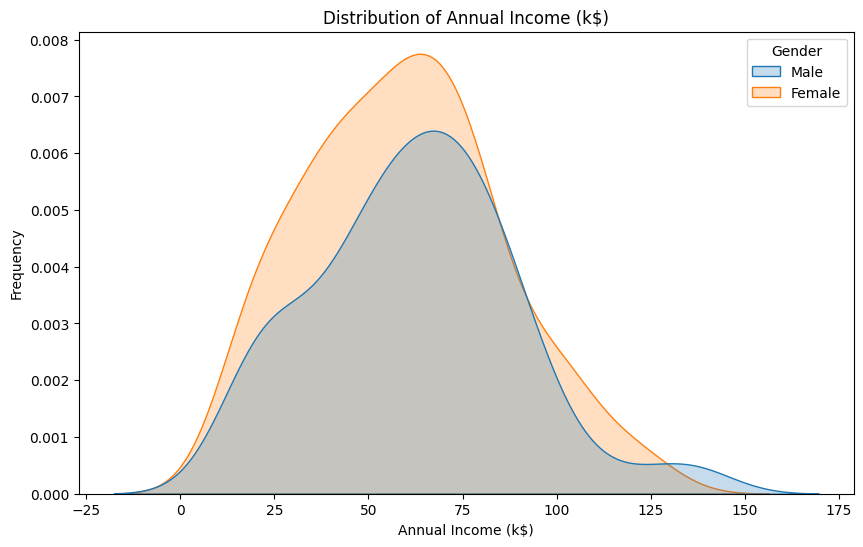

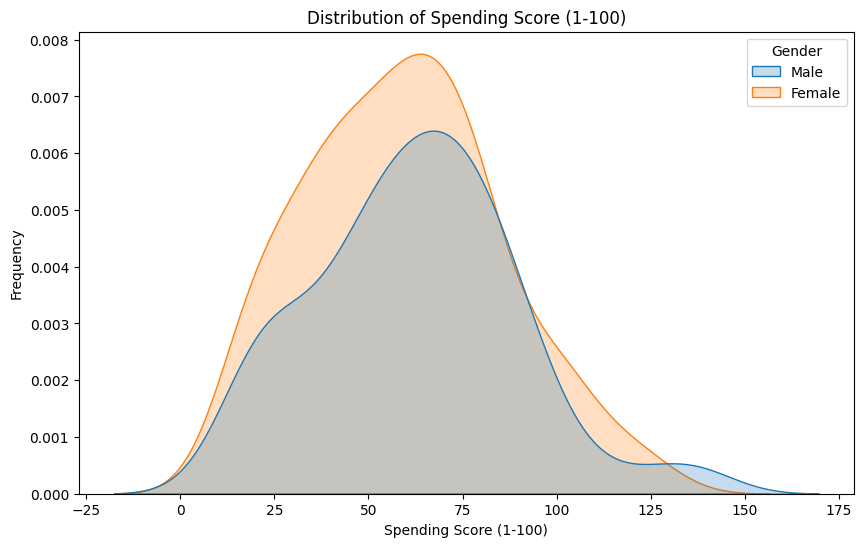

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure(figsize=(10, 6))
  sns.kdeplot(x=df['Annual Income (k$)'], shade=True, hue = df['Gender'])
  plt.title(f'Distribution of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()

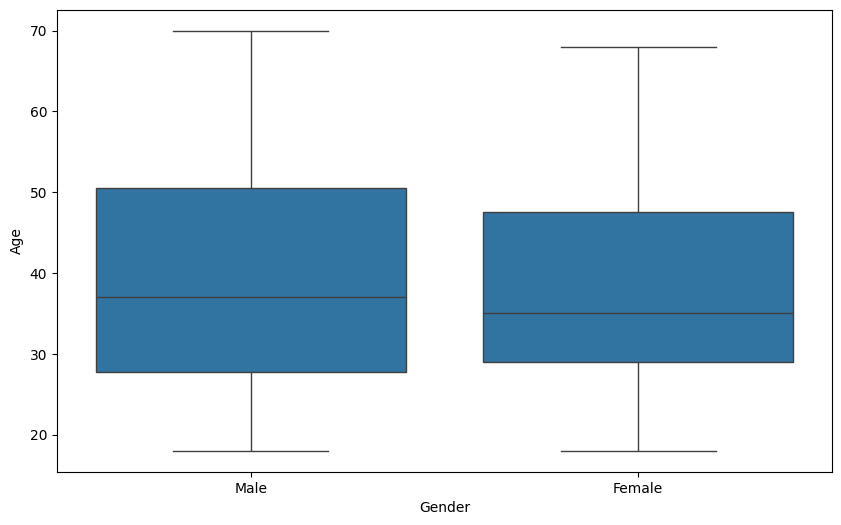

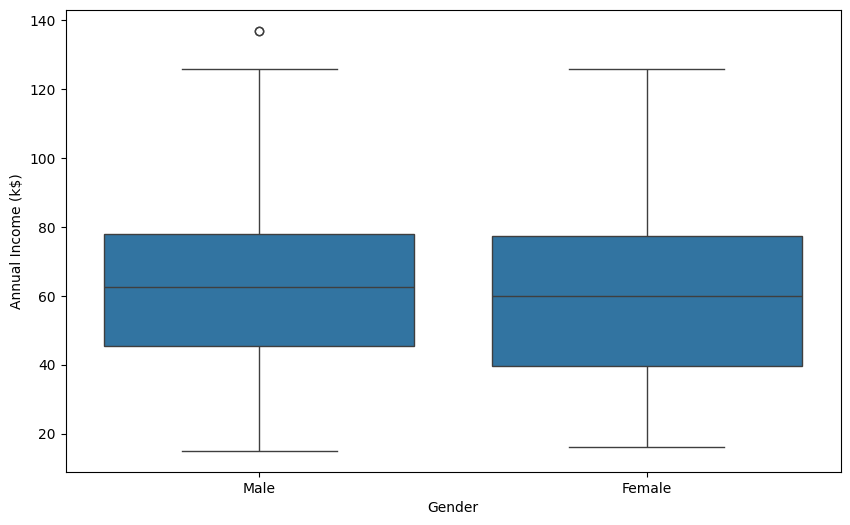

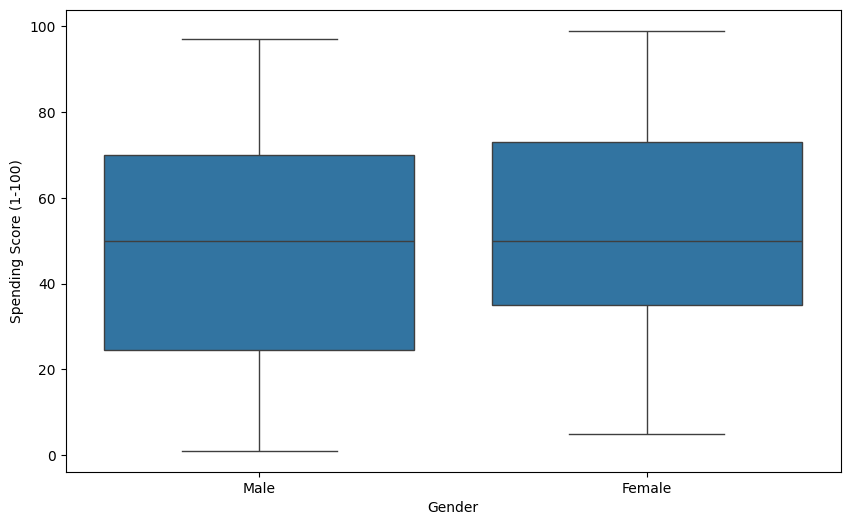

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=df, x='Gender', y=df[i])

In [ ]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


# Bivariate Analysis

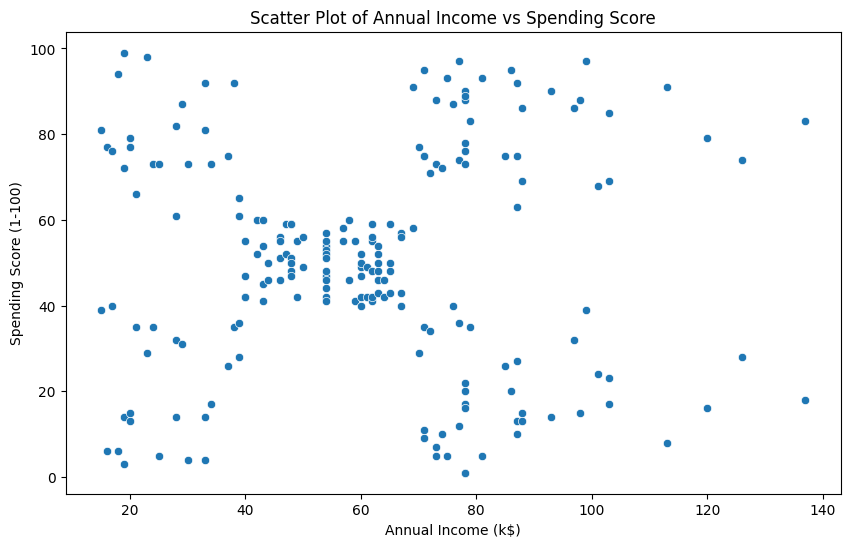

In [ ]:
# use seaborn to plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

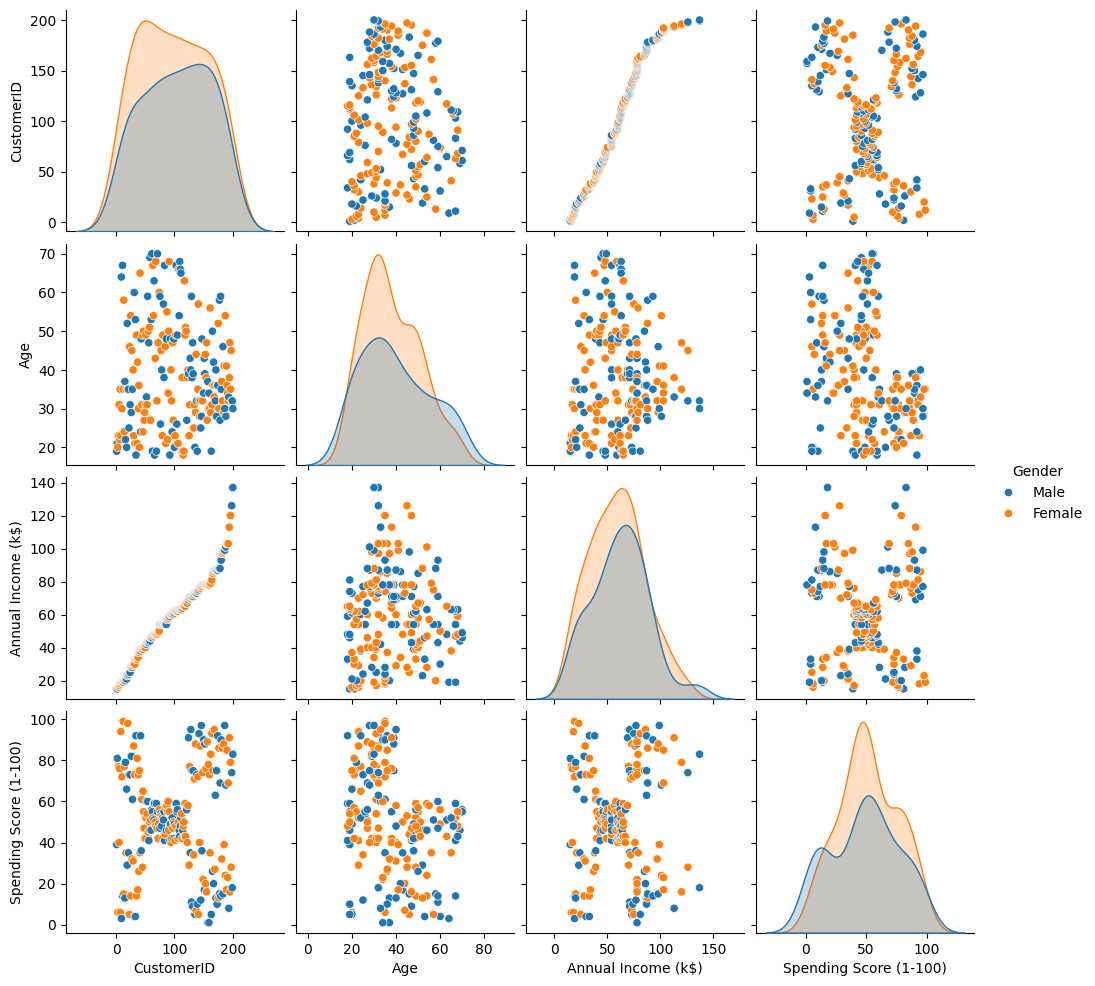

In [ ]:
# use seaborn to plot pairplot
#df = df.drop('CustomerID', axis=1)
sns.pairplot(df, hue='Gender')
plt.show()

In [ ]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
# display corr
df.drop('Gender', axis=1).corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


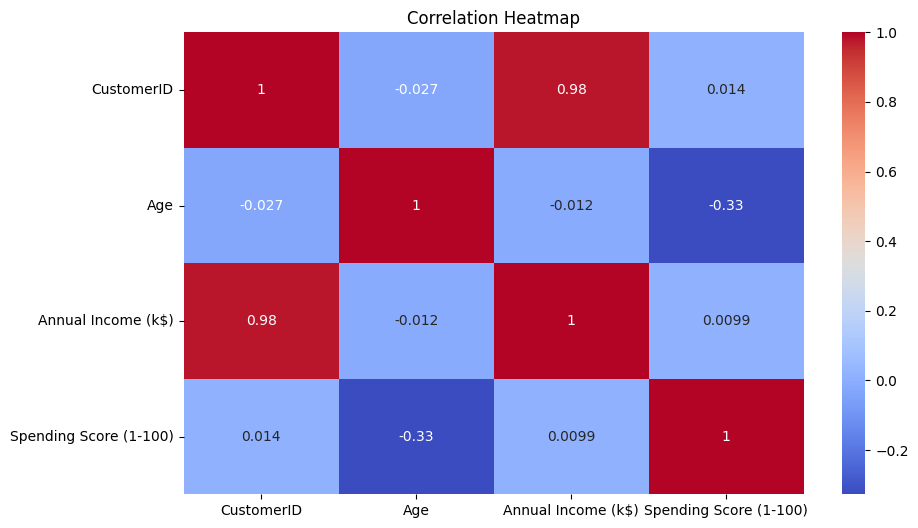

In [ ]:
# plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('Gender', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Clustering Univariate

In [ ]:
# use Kmeans algorithm
clustering1 = KMeans(n_clusters=3, random_state=42)

In [ ]:
# fit the model
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3, random_state=42)

In [ ]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [ ]:
df['Income Cluster'].value_counts()

,count
Income Cluster,
0,86
2,58
1,56


In [ ]:
clustering1.inertia_

25640.457784396807

In [ ]:
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [ ]:
inertia_scores

[137277.2800000002,
 49761.737012987025,
 25640.457784396807,
 13556.82927489177,
 8667.679614837503,
 5081.484660267269,
 4237.491459417777,
 2871.629365079367,
 2309.6901709401714,
 1903.2033549783544]

Text(0, 0.5, 'Inertia')

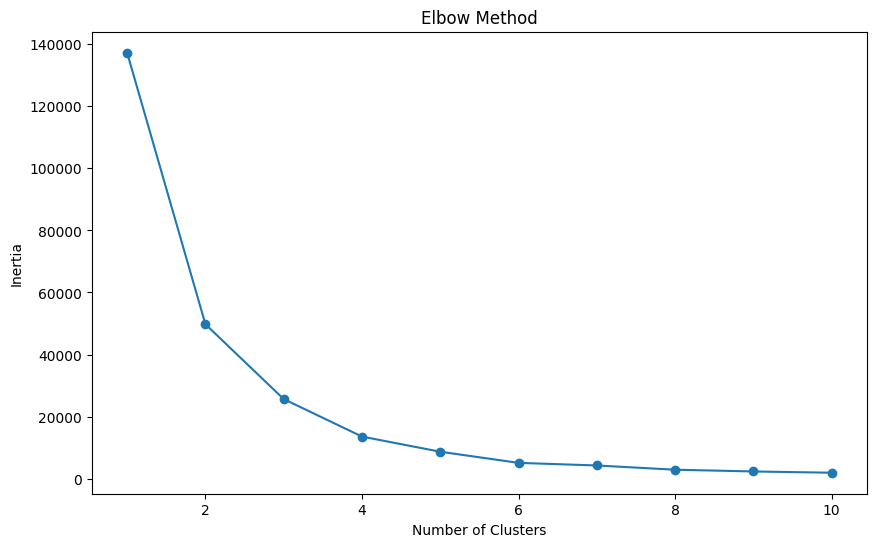

In [ ]:
# plot inertia scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_scores, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [ ]:
# group by "Income Cluster"
df.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


# Clustering Bivariate

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
clustering2 = KMeans(n_clusters=5, random_state=42)

In [ ]:
# fit the model
clustering2.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
clustering2.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
df['Income and Spending Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,2,4


In [ ]:
inertia_scores2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, random_state=42)
    kmeans2.fit(X)
    inertia_scores2.append(kmeans2.inertia_)

In [ ]:
inertia_scores2

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.471609793436,
 23103.122085983905]

Text(0, 0.5, 'Inertia')

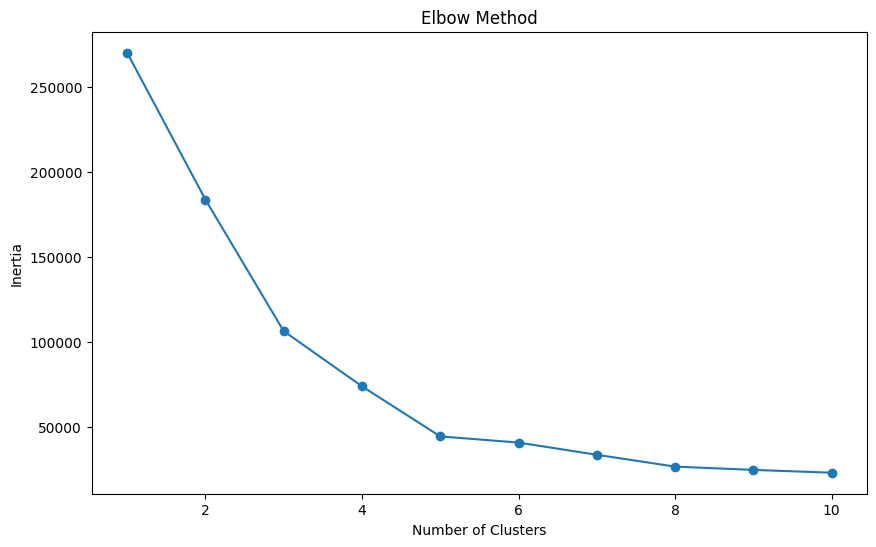

In [ ]:
# plot inertia scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_scores2, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [ ]:
# cluster centers
clustering2.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [ ]:
# add to dataframe
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

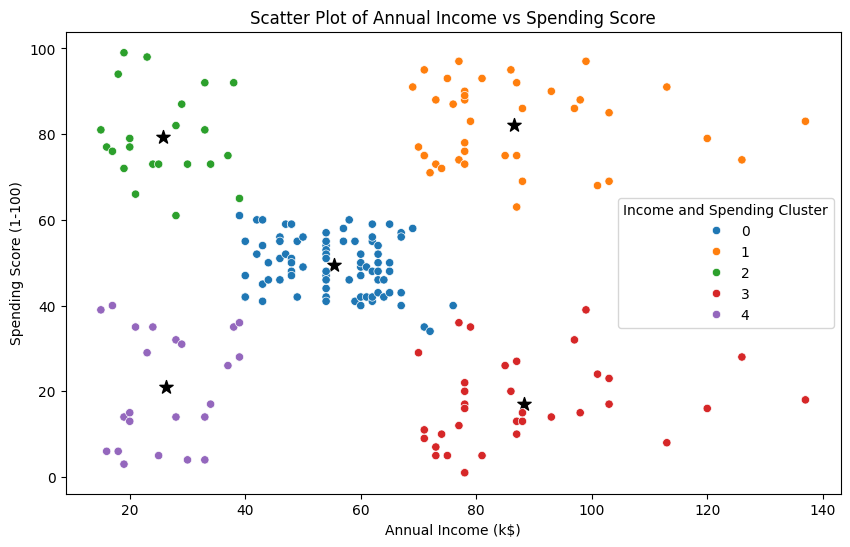

In [ ]:
# plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=centers['x'], y=centers['y'], marker='*', s=100, c='black')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income and Spending Cluster', palette='tab10')
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
# group by "Income Cluster"
df.groupby(['Income and Spending Cluster'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income and Spending Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [ ]:
y_means = clustering2.fit_predict(X)

In [ ]:
# to some predictions
clustering2.predict([[100, 80]])

array([1], dtype=int32)

# MultiVariate Cluster

In [ ]:
#from sklearn.preprocessing import StandardScaler

In [ ]:
#scaler = StandardScaler()

In [ ]:
#df.head()

In [ ]:
# drop customerid column
#df = df.drop('CustomerID', axis=1)

In [ ]:
# drop 'Income Cluster' and 'Income and Spending Cluster' columns
#df = df.drop(['Income Cluster', 'Income and Spending Cluster'], axis=1)

In [ ]:
# use map function to encode "Gender" column
#df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
# scale and fit the data
#df = scaler.fit_transform(df)

In [ ]:
#df = pd.DataFrame(scaler.fit_transform(df))

In [ ]:
#df.head()

In [ ]:
# inertia_scores3 = []
# for i in range(1, 11):
#     kmeans3 = KMeans(n_clusters=i, random_state=42)
#     kmeans3.fit(df)
#     inertia_scores3.append(kmeans3.inertia_)

In [ ]:
# # plot inertia scores
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), inertia_scores3, marker='o')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.savefig('elbow.png')

In [ ]:
import joblib

In [ ]:
joblib.dump(clustering2, 'customer_segmentation')

['customer_segmentation']

In [ ]:
model = joblib.load('customer_segmentation')

In [ ]:
# make predictions
model.predict([[20, 10]])

array([4], dtype=int32)

GUI

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd

# Load the trained K-Means model
model = joblib.load('customer_segmentation')

# Define the function to make predictions
def predict_segment(annual_income, spending_score):
    """Predicts the customer segment based on Annual Income and Spending Score."""
    data = [[annual_income, spending_score]]
    segment = model.predict(data)[0]
    return segment

# Define the Streamlit app interface
st.title('Customer Segmentation Prediction')

st.write('Enter the customer\'s Annual Income and Spending Score to predict their segment.')

annual_income = st.number_input('Annual Income (k$)', min_value=0.0, value=50.0)
spending_score = st.number_input('Spending Score (1-100)', min_value=0.0, max_value=100.0, value=50.0)

if st.button('Predict'):
    segment = predict_segment(annual_income, spending_score)

    st.subheader('Prediction Result:')
    if segment == 0:
        st.write("This customer belongs to Cluster 0: Customers with Medium Annual Income and Medium Spending Score")
    elif segment == 1:
        st.write("This customer belongs to Cluster 1: Customers with High Annual Income and High Spending Score")
    elif segment == 2:
        st.write("This customer belongs to Cluster 2: Customers with Low Annual Income and High Spending Score")
    elif segment == 3:
        st.write("This customer belongs to Cluster 3: Customers with High Annual Income and Low Spending Score")
    elif segment == 4:
        st.write("This customer belongs to Cluster 4: Customers with Low Annual Income and Low Spending Score")

Writing app.py


In [ ]:
!pip install streamlit pyngrok -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.145.131.158


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.145.131.158:8501

⠼⠴⠦⠧⠇⠏Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://eight-parrots-fall.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
